# COVID-19 sentiment Analysis

In [30]:
#import spacy

In [31]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load the data

In [32]:
data_train = pd.read_csv("Corona_NLP_train.csv", encoding='ISO-8859-1')
data_test = pd.read_csv("Corona_NLP_test.csv", encoding='ISO-8859-1')

In [33]:
data_train.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [34]:
data_test.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# Preprocessing and Cleaning

Get the train data info

In [35]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


The integer columns won't tell me much about the tweets sentiments. So I will drop those and just used Original tweet amd Sentiment columns only

In [36]:
new_data_train = data_train[['OriginalTweet', 'Sentiment']]

# Let's take a look at the new dataframe

In [37]:
new_data_train.head(3)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive


Let's check for missing values

In [38]:
#count the number of missing values
miss_value = pd.concat([new_data_train.isnull().sum(), 100 * new_data_train.isnull().mean()], axis=1)
miss_value.columns=['count', '%']
miss_value.sort_values(by=['%'],ascending=False)

,count,%
OriginalTweet,0,0.0
Sentiment,0,0.0


Since no missing values, I will proceed to EDA

# Exploratory Data Analysis

I want to know if the sentiments are unique.

In [39]:
f"Unique Sentiments: {new_data_train['Sentiment'].unique()}"

"Unique Sentiments: ['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']"

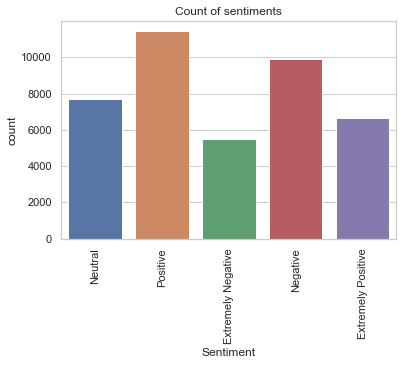

In [40]:

ax=sns.countplot(x="Sentiment", data=new_data_train)
ax.set_title("Count of sentiments")
plt.xticks(rotation=90)
plt.show()

We see that there were more positive sentiment towards how to handle covid than negative sentiments. Even the extremely negative sentiments were still less than that of extremely positive sentiments. The number of tweets that were neutral is less than that of negative tweets. 

# Sentiments in percentages

for train data

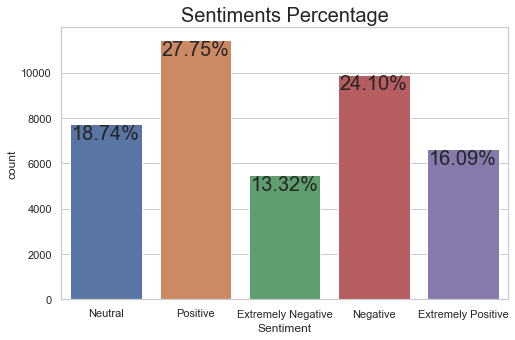

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(new_data_train))
ax = sns.countplot(x="Sentiment", data=new_data_train)
plt.title('Sentiments Percentage', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', va='top', size =20)
plt.show()

for test data

In [42]:
new_data_test = data_test[['OriginalTweet', 'Sentiment']]

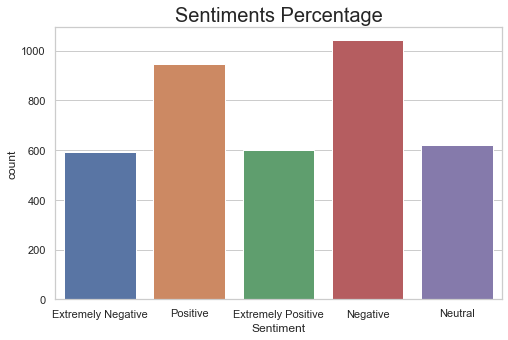

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(new_data_train))
a = sns.countplot(x="Sentiment", data=new_data_test)
plt.title('Sentiments Percentage', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='center', va='top', size =20)
plt.show()

Not all words is important, so I will remove unwanted words using the the spotwords.words()

In [44]:
nltk_stop = stopwords.words("english")

In [45]:
import re #import re to remove unwanted words

In [46]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:

for text in new_data_train['OriginalTweet']:
    word_tokenize(text)
    #tokenization and remove punctuations
    text = re.sub(r'http\S+', " ", text)
    text = re.sub(r"[^A-Za-z@]", "", text)
    text = re.sub(r"\S+com", "", text)
    text = re.sub(r"\S+@\S+", "", text)
    text = re.sub(r'@\w+',' ',text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'<.*?>',' ', text)
    text = text.split()
    text = " ".join([word for word in text if not word in nltk_stop])

In [151]:
import string
for word in text:
    text = text.lower()
    if word != ' ':
        text = text
    elif text == string.punctuation:
        text = text.replace(punctuation, "")

Do the same for the testing data

In [152]:
for text_test in new_data_test['OriginalTweet']:
    word_tokenize(text_test)
    #tokenization and remove punctuations
    text_test = re.sub(r'http\S+', " ", text_test)
    text_test = re.sub(r"[^A-Za-z@]", "", text_test)
    text_test= re.sub(r"\S+com", "", text_test)
    text_test = re.sub(r"\S+@\S+", "", text_test)
    text_test = re.sub(r'@\w+',' ', text_test)
    text_test = re.sub(r'#\w+', ' ', text_test)
    text_test = re.sub(r'<.*?>',' ', text_test)
    text_test = text_test.split()
    text_test = " ".join([word for word in text_test if not word in nltk_stop])

In [153]:
for word in text_test:
    text_test = text_test.lower()
    if word != ' ':
        text_test = text_test
    elif text_test == string.punctuation:
        text_test = text_test.replace(punctuation, "")

In [154]:
text_test

'mittedtothesafetyofouremployeesandourenduserswearemonitoringcovidrestassuredthattissuemanufacturersarecontinuingtoproduceandshipproducts'

# Feature Engineering

Adding new columns to represent the sentiments as numbers from 0 to 4. 0 being  'Extremely Negative' and 4 being 'Negative' 'Extremely Positive'

In [155]:
from sklearn.preprocessing import LabelEncoder

In [156]:
new_data_train['Sent_rating'] = LabelEncoder().fit_transform(new_data_train['Sentiment'])
new_data_test['Sent_rating'] = LabelEncoder().fit_transform(new_data_test['Sentiment'])

<ipython-input-156-ce38eb8daa46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_train['Sent_rating'] = LabelEncoder().fit_transform(new_data_train['Sentiment'])
<ipython-input-156-ce38eb8daa46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_test['Sent_rating'] = LabelEncoder().fit_transform(new_data_test['Sentiment'])


In [157]:
new_data_train.head()

,OriginalTweet,Sentiment,Sent_rating
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,advice Talk to your neighbours family to excha...,Positive,4
2,Coronavirus Australia: Woolworths to give elde...,Positive,4
3,My food stock is not the only one which is emp...,Positive,4
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [158]:
new_data_test.head()

,OriginalTweet,Sentiment,Sent_rating
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0
1,When I couldn't find hand sanitizer at Fred Me...,Positive,4
2,Find out how you can protect yourself and love...,Extremely Positive,1
3,#Panic buying hits #NewYork City as anxious sh...,Negative,2
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,3


Prepare the data for training

In [159]:
import numpy as np

In [160]:
x_train = new_data_train['OriginalTweet']
y_train = new_data_train['Sent_rating']

x_test = new_data_test['OriginalTweet']
y_test = new_data_test['Sent_rating']

In [161]:
train_length = np.max(x_train.apply(lambda x: len(x)))
test_length = np.max(x_test.apply(lambda x: len(x)))


In [162]:
max_sequence_len = train_length
if test_length > train_length:
    max_sequence_len = train_length
max_sequence_len

355